In [ ]:
### included sections for data preprocessing, analysis, and findings of the set .csv file
### this is an SDA of the vehicles_us.csv, where we'll clear duplicates, clean the dataset, and reprocess it for analysis

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('C:\\Users\\micha\\TripleTen\\Project4\\vehicles_us.csv')

In [5]:
# Dropping duplicates from dataset
duplicates = data.duplicated().sum()
data = data.drop_duplicates()

In [6]:
# Replacing missing values with ffill
missing_values = data.isnull().sum()
data = data.fillna(method='ffill')
display(missing_values)

C:\Users\micha\AppData\Local\Temp\ipykernel_16960\1144949733.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
# Displaying info
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.0,51525.00000
mean,12132.464920,2009.749694,6.131936,115533.913130,1.0,39.55476
std,10040.803015,6.283727,1.659378,65027.532347,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


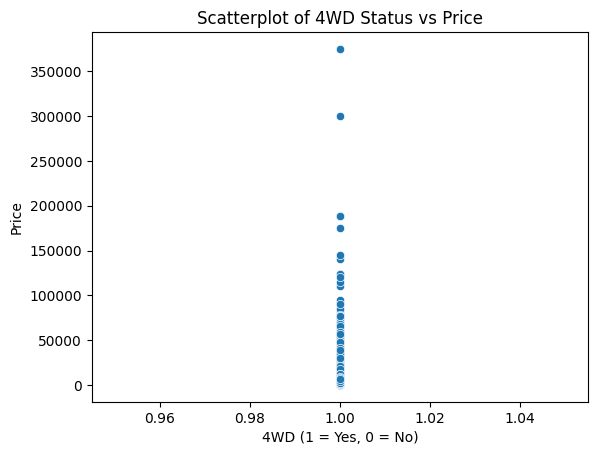

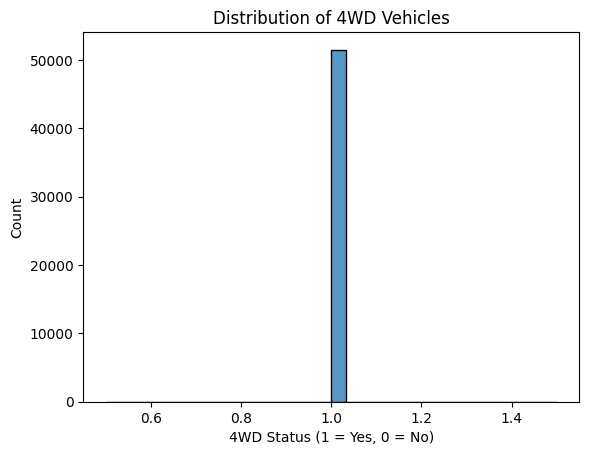

In [13]:
# Scatterplot
sns.scatterplot(data=data, x='is_4wd', y='price')
plt.title('Scatterplot of 4WD Status vs Price')
plt.xlabel('4WD (1 = Yes, 0 = No)')
plt.ylabel('Price')
plt.show()

# Histogram: Distribution of 4WD Vehicles
sns.histplot(data['is_4wd'], bins=30)
plt.title('Distribution of 4WD Vehicles')
plt.xlabel('4WD Status (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

In [14]:
# Counting 4WD vs 2WD Vehicles
fourwd_counts = data['is_4wd'].value_counts()
print(fourwd_counts)

is_4wd
1.0    51525
Name: count, dtype: int64


C:\Users\micha\AppData\Local\Temp\ipykernel_16960\1579539943.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='4WD Status', y='Count', data=summary_df, palette='Set2')


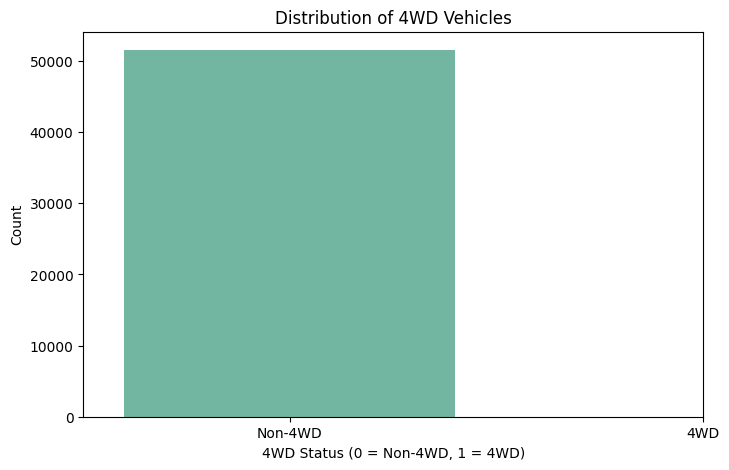

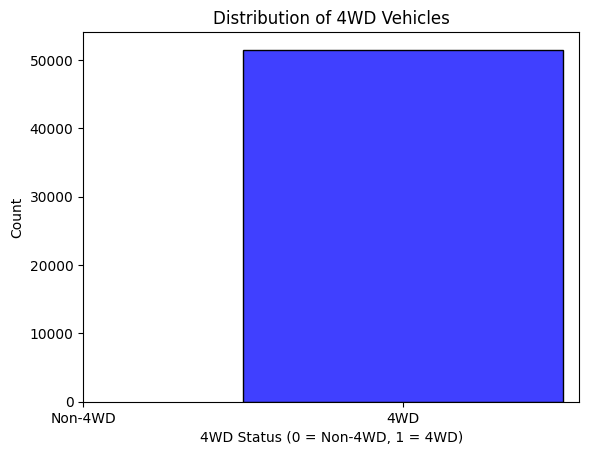

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summarize the 4WD distribution
fourwd_counts = data['is_4wd'].value_counts()

# Create a DataFrame for plotting
summary_df = fourwd_counts.reset_index()
summary_df.columns = ['4WD Status', 'Count']

# Create a combined bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='4WD Status', y='Count', data=summary_df, palette='Set2')
plt.title('Distribution of 4WD Vehicles')
plt.xlabel('4WD Status (0 = Non-4WD, 1 = 4WD)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-4WD', '4WD'])
plt.show()

sns.histplot(data['is_4wd'], bins=2, discrete=True, color='blue')  # Use bins=2 for binary data
plt.title('Distribution of 4WD Vehicles')
plt.xlabel('4WD Status (0 = Non-4WD, 1 = 4WD)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-4WD', '4WD'])  # Customizing x-ticks for clarity
plt.show()